In [10]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical
import scipy as sp
import numpy as np
import pandas as pd

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from tqdm import tqdm

In [2]:
# loading bag of ingredients represetation
boi = pd.read_csv('dataset/bag_of_ingre_w_cuisine.csv', index_col=0)
cuisines_df = pd.read_csv('dataset/Cuisines.csv', names=['cuisine'])

# make boi cuisine labels match actual cuisine labels
boi['cuisine'] = boi['cuisine'].transform(lambda x: x+1, axis=0)

In [3]:
boi.head()

,acorn_squash,adobo,african_birdseye_chile_pepper,ale,aleppo_pepper,alfalfa_sprouts,alfredo_sauce,allspice,almond,almond_butter,...,yeast,yellow_curry_paste,yellow_food_coloring,yellow_split_pea,yellow_squash,yogurt,zaatar,zest,zucchini,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
cuisines_df

,cuisine
1,Chinese
2,English
3,French
4,German
5,Greek
6,Indian
7,Italian
8,Japanese
9,Mexican
10,Moroccan


In [5]:
# Split into data and labels

X = boi.drop(["cuisine"], axis=1)
y = boi["cuisine"]

In [6]:
# Split into train/valid/test

X_train_ho, X_test, y_train_ho, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train_ho, y_train_ho, test_size=0.20, random_state=42)

In [7]:
# Dummy baseline

np.set_printoptions(precision=2)
strategies = ["most_frequent", "uniform"]

cm = []
for st in strategies:
    
    print("\n")
    print(f"Dummy Classifier with strategy: {st}")
    print("\n")
    
    pipe = Pipeline([(st, DummyClassifier(strategy=st))])
    pipe.fit(X_train_ho, y_train_ho)
    train_acc = pipe.score(X_train_ho, y_train_ho)
    test_acc = pipe.score(X_test, y_test)
    preds = pipe.predict(X_test)

    # Print results
    print("Dummy classification accuracy on training set:") 
    print("Using the accuracy_score() function: {:.3f}".format(train_acc))
    print("Dummy classification accuracy on test set:") 
    print("Using the accuracy_score() function: {:.3f}".format(test_acc))
    
    cm.append(confusion_matrix(y_test, preds, normalize="true"))   




Dummy Classifier with strategy: most_frequent


Dummy classification accuracy on training set:
Using the accuracy_score() function: 0.086
Dummy classification accuracy on test set:
Using the accuracy_score() function: 0.071


Dummy Classifier with strategy: uniform


Dummy classification accuracy on training set:
Using the accuracy_score() function: 0.086
Dummy classification accuracy on test set:
Using the accuracy_score() function: 0.080


In [8]:
plot_confusion_matrix(cm[1], class_labels=cuisines_df.to_numpy(dtype="<U28").squeeze())

NameError: name 'plot_confusion_matrix' is not defined

In [9]:
def plot_confusion_matrix(cm, class_labels=None):
    """Plots a confusion matrix using seaborn's heatmap function
    
    Columns and rows are labelled with the strings provided in class_labels.
    
    Parameters
    ----------
    cm: array-like
        contains the confusion matrix
        
    class_labels: array-like, optional
        contains the string labels
            
    """
    
    # check whether we have count data or not
    if issubclass(cm.dtype.type, np.integer):
        fmt = 'd'
    else:
        fmt = '.2f'
    
    # Your code goes here
    
    if class_labels is not None:
        sns.heatmap(cm, cmap='viridis',xticklabels=class_labels, yticklabels=class_labels,\
                    annot=True, annot_kws={"fontsize":9},  fmt=fmt)  # controls the display of the numbers
    else:
        sns.heatmap(cm, annot=True, annot_kws={"fontsize":9},  fmt=fmt)
        
    plt.ylabel('True label', fontweight='bold')
    plt.xlabel('Predicted label', fontweight='bold')
    
    # you can change the appearance of the figure with lower-level matplotlib commands
    # here we rotate the labels on the x-axis
    plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

In [15]:
# Comparison of classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

random_state = 42

names = ["Dummy, most frequent", "Gaussian Naive Bayes", "Logistic Regression",
         "Nearest Neighb (10)", "Nearest Neighb (5)",
         "Linear SVM", "RBF SVM",
         "Random Forest", "MLP", "MLP stronger reg"]
classifiers = [
    DummyClassifier(strategy='most_frequent'),
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(n_neighbors=10),
    KNeighborsClassifier(n_neighbors=5), 
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(random_state=random_state, max_iter=800),  # default regularisation
    MLPClassifier(random_state=random_state, max_iter=800, alpha=1)  # more regularisation
    ]

# Training 
ca_train_score = {}  # Classification accuracy
ce_train_score = {}  # Cross-entropy

# Validation
ca_val_score = {} 
ce_val_score = {}

# Predictions
preds = {} 

for name, clf in tqdm(zip(names, classifiers)):
    clf.fit(X_train_ho, y_train_ho)
    
    ca_train_score[name] = clf.score(X_train_ho, y_train_ho)
    ce_train_score[name] = log_loss(y_train_ho, clf.predict_proba(X_train_ho))
    
    ca_val_score[name] = clf.score(X_valid, y_valid)
    ce_val_score[name] = log_loss(y_valid, clf.predict_proba(X_valid))
    
    preds[name] = clf.predict(X_valid)

10it [12:19, 74.00s/it]


In [16]:
 # Your code goes here (evaluation)

print('Classification performance on validation set: \n')
print("{0:<20s}   {1:-^25s}   {2:-^21s}".format('','Validation', 'Training'))
print("{0:<20s}{1:>13s}{2:>13s}{3:>13s}{4:>13s}".format(
    'Method', 'Accuracy\u2191', 'Log-loss\u2193',
    'Accuracy\u2191', 'Log-loss\u2193'))
print("-"*(20+4*13))
for clf in names:
    print ("{method:<20s}{val_accuracy:>13.3f}{val_logloss:>13.3f}{train_accuracy:>13.3f}{train_logloss:>13.3f}".format(
        method=clf, val_accuracy=ca_val_score[clf], val_logloss=ce_val_score[clf],
        train_accuracy=ca_train_score[clf], train_logloss=ce_train_score[clf]))

Classification performance on validation set: 

                       -------Validation--------   ------Training-------
Method                  Accuracy↑    Log-loss↓    Accuracy↑    Log-loss↓
------------------------------------------------------------------------
Dummy, most frequent        0.084       31.635        0.086       31.552
Gaussian Naive Bayes        0.643       11.893        0.665       11.200
Logistic Regression         0.917        0.362        0.914        0.362
Nearest Neighb (10)         0.726        0.777        0.725        0.766
Nearest Neighb (5)          0.763        0.584        0.758        0.577
Linear SVM                  0.956        0.370        0.952        0.359
RBF SVM                     0.938        0.250        0.929        0.249
Random Forest               0.795        1.369        0.798        1.353
MLP                         1.000        0.004        1.000        0.005
MLP stronger reg            0.895        0.469        0.879        0.475


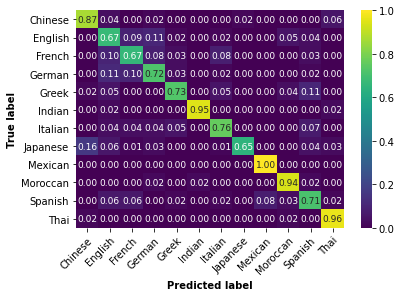

In [19]:
names = ["Dummy, most frequent", "Gaussian Naive Bayes", "Logistic Regression",
         "Nearest Neighb (10)", "Nearest Neighb (5)",
         "Linear SVM", "RBF SVM",
         "Random Forest", "MLP", "MLP stronger reg"]

cm = confusion_matrix(y_valid, preds["Random Forest"], normalize="true")
plot_confusion_matrix(cm, class_labels=cuisines_df.to_numpy(dtype="<U28").squeeze())